# Assignment 1: Working with Python
## By: Chandinee C

Create a class to model thermostatically controlled loads. Use equations provided in the following paper:

https://www.mdpi.com/1996-1073/12/13/2463 (section 2.1)

Use this class to create 5 instances (objects) of the load model

1. Use the constructor to initialize the model using the following parameters

    * R = rand [30, 50]
    * C = rand [20, 30]
    * P = rand [1, 3]
    * $T_0$ = rand [70, 75] $\degree F$
    * $T_{set}$ = 72 $\degree F$
    * $T_{deadband}$ = 3 $\degree F$
    * Assume ambient temperate to be constant at 100 $\degree F$ <br>
    * State Variable {0,1} (ON or OFF)
<br>
  
2. add an "update" method to the class to implement the equations from the paper.
    * run the models for 1440 time steps
    * plot internal temperates for all 5 load models in a single plot
<br><br>


Equation: <br>
    $ \quad \quad \quad \quad \quad \quad T^{.}(t) = \frac{1}{CR} (T_{a} - T(t) -s(t)RP)$

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Class 
class ThermostaticallyControlledLoad:
    def __init__(self):
        self.R = random.uniform(30, 50)
        self.C = random.uniform(20, 30)
        self.P = random.uniform(1, 3) 
        self.T= random.uniform(70,75) #F
        self.T_set = 72  # F Initial internal temperature
        self.T_deadband = 3 # F deadband temperature  
        self.ambient_T = 100  # Constant ambient temperature
        self.s = 0 # State Variable

    def update(self, time_step):
        
        
        # Get Upperbound and Lower bound from the T_set and T_deadband
        delta_t = self.T_deadband
        T_upper = self.T_set + (delta_t/2)
        T_lower = self.T_set - (delta_t/2)
        
        # s(t) =1  if T value is outside/above the upper bounds
        # s(t) =0  if T value is lower than lower bounds

        
        if (self.T >= T_upper):
            # s(t) is ON or s(t) = 1
             self.s =1
            #print("ON:", self.T)
            
        elif (self.T <= T_lower): 
            # s(t) is OFF or s(t) = 0
            self.s =0
            #print("OFF:", self.T)

        # Update Equation
        # Set T value according to On or OFF state of s(t)
        self.T += (1 / (self.C * self.R)) * (self.ambient_T - self.T  - ( self.s  * (self.R * self.P)))    
        

In [6]:
def main():
    # Creating 5 instances of the class ThermostaticallyControlledLoad 
    load_models = [ThermostaticallyControlledLoad() for _ in range(5)]

    # 5 list for 5 load models
    Temp_loadModel = [[] for _ in range(5)]

    # Temperature set point for 1440 time steps, 1440 for loop
    for time_step in range(1440):
        for i, lm in enumerate(load_models): #for loop for 5 class object
            lm.update(1)  # inside loop for 1440 time step
            Temp_loadModel[i].append(lm.T)

    plt.figure(figsize=(10,6))
    # Plot for 5 load models 
    for i, t in enumerate(Temp_loadModel):
        plt.plot(range(1440), t, label=f'Load Model {i + 1}')

   
    plt.xlabel('Time')
    plt.ylabel('Temperature (F)')
    plt.title('5 load model Instances for TLC')
    plt.legend()
    plt.grid(True)
    plt.show()

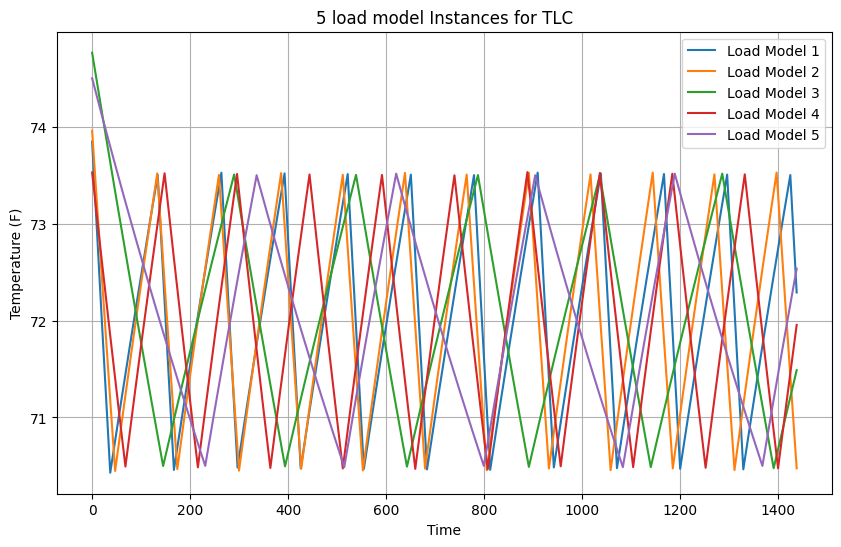

In [7]:
if __name__ == "__main__":
    main()

In [4]:
load_model_2 = ThermostaticallyControlledLoad()

# Call the update function
temp_arr=[]
temp_load=[]
print("T upperbound:", load_model_2.T_set + (load_model_2.T_deadband /2) ,"F", "Lower Bound:", load_model_2.T_set - (load_model_2.T_deadband /2), "F")

for i in range(1440):
    load_model_2.update(1)
    temp_arr.append(load_model_2.s)
    temp_load.append(load_model_2.T)

#temp_load

T upperbound: 73.5 F Lower Bound: 70.5 F


###  State Variable (ON / OFF) vs Load Model Graph

<Figure size 2000x1200 with 0 Axes>

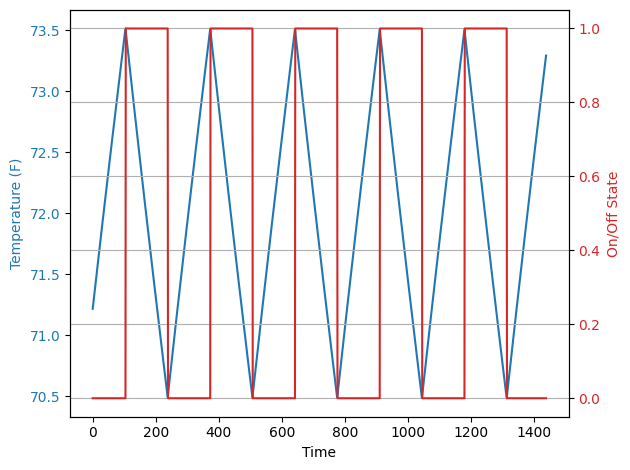

In [5]:
# Plotting Temperature and State Variable together
t = np.arange(0, 1440, 1)
plt.figure(figsize=(20,12))
fig, ax1 = plt.subplots()


color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature (F)', color=color)
ax1.plot(t, temp_load, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Second y axis

color = 'tab:red'
ax2.set_ylabel('On/Off State', color=color)  
ax2.plot(t, temp_arr, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.grid(True)
plt.show()

## Reference

1. https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
2. https://www.geeksforgeeks.org/enumerate-in-python/
3. Frank Bergh for suggestion in debugging the equation logic issue